In [45]:
# Essential
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns

In [46]:
# Load the IMDB dataset (reviews and labels)
num_words = 10000  # Limit the number of words to the 10,000 most frequent
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure they are all the same length
max_len = 500  # Maximum length of each review
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


Training data shape: (25000, 500)
Testing data shape: (25000, 500)


In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output (0 = negative, 1 = positive)
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_8      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [49]:
history = model.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_test, y_test), verbose=2)

Epoch 1/5
49/49 - 8s - 169ms/step - accuracy: 0.4904 - loss: 0.6933 - val_accuracy: 0.4952 - val_loss: 0.6932
Epoch 2/5
49/49 - 7s - 151ms/step - accuracy: 0.4898 - loss: 0.6933 - val_accuracy: 0.4958 - val_loss: 0.6932
Epoch 3/5
49/49 - 7s - 137ms/step - accuracy: 0.4905 - loss: 0.6933 - val_accuracy: 0.4976 - val_loss: 0.6932
Epoch 4/5
49/49 - 6s - 132ms/step - accuracy: 0.4908 - loss: 0.6933 - val_accuracy: 0.4974 - val_loss: 0.6932
Epoch 5/5
49/49 - 6s - 129ms/step - accuracy: 0.4904 - loss: 0.6932 - val_accuracy: 0.4985 - val_loss: 0.6931


In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4889 - loss: 0.6933
Test accuracy: 0.4985


In [51]:
# Example: Predict the sentiment of a review
new_review = "The movie was fantastic, I loved it!"  # A positive review
new_review_seq = imdb.get_word_index()
new_review_seq = [new_review_seq.get(word, 0) for word in new_review.lower().split()]
new_review_seq = pad_sequences([new_review_seq], maxlen=max_len)

prediction = model.predict(new_review_seq)
print("Prediction (1 = Positive, 0 = Negative):", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction (1 = Positive, 0 = Negative): 0.50749785


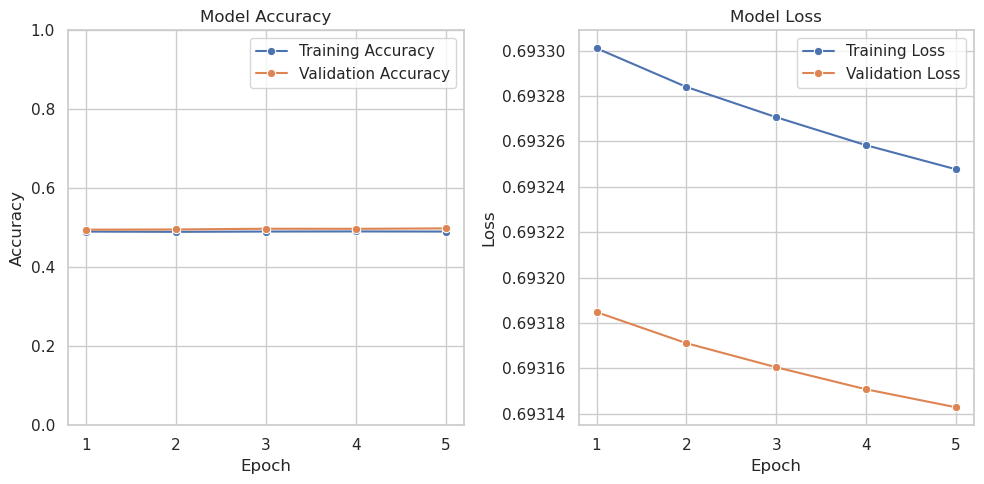

In [52]:
if __name__ == "__main__":
    # Convert the history.history dict to a DataFrame
    df = pd.DataFrame(history.history)
    epochs = range(1, len(df) + 1)

    sns.set_theme(style="whitegrid")  # Apply seaborn style

    plt.figure(figsize=(10, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(x=epochs, y=df['accuracy'], marker='o', label='Training Accuracy')
    sns.lineplot(x=epochs, y=df.get('val_accuracy', []), marker='o', label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    sns.lineplot(x=epochs, y=df['loss'], marker='o', label='Training Loss')
    sns.lineplot(x=epochs, y=df.get('val_loss', []), marker='o', label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()